In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
from collections import Counter
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

In [3]:
def load_dataset (file):
    dataset = pd.read_csv(file)
    return dataset

path = "Dataset-Exos2.csv"
dataset = load_dataset(path)

In [4]:
def visualize_data (dataset) :
    print(dataset.head())
    print ("Nombre de lignes du dataset :", dataset.shape[0])
    print("Nombre de colonnes du dataset : ", dataset.shape[1])
    print("Noms des colonnes : ", dataset.columns.tolist())

visualize_data(dataset)

  Watcher  videoCategoryId     videoCategoryLabel definition
0   Billy             29.0  Nonprofits & Activism         hd
1   Leila             22.0         People & Blogs         sd
2   Billy             22.0         People & Blogs         sd
3    Mark             24.0          Entertainment         hd
4   Billy             24.0          Entertainment         hd
Nombre de lignes du dataset : 999
Nombre de colonnes du dataset :  4
Noms des colonnes :  ['Watcher', 'videoCategoryId', 'videoCategoryLabel', 'definition']


In [5]:
dataset.isna().sum()

Watcher               884
videoCategoryId       884
videoCategoryLabel    884
definition            887
dtype: int64

In [6]:
newdataset = dataset.dropna(subset = ['Watcher', 'videoCategoryId', 'videoCategoryLabel'])
newdataset

,Watcher,videoCategoryId,videoCategoryLabel,definition
0,Billy,29.0,Nonprofits & Activism,hd
1,Leila,22.0,People & Blogs,sd
2,Billy,22.0,People & Blogs,sd
3,Mark,24.0,Entertainment,hd
4,Billy,24.0,Entertainment,hd
...,...,...,...,...
110,Jeff,24.0,Entertainment,hd
111,Billy,26.0,Howto & Style,sd
112,Clark,28.0,Science & Technology,hd
113,Billy,24.0,Entertainment,sd


In [7]:
visualize_data(newdataset)

  Watcher  videoCategoryId     videoCategoryLabel definition
0   Billy             29.0  Nonprofits & Activism         hd
1   Leila             22.0         People & Blogs         sd
2   Billy             22.0         People & Blogs         sd
3    Mark             24.0          Entertainment         hd
4   Billy             24.0          Entertainment         hd
Nombre de lignes du dataset : 115
Nombre de colonnes du dataset :  4
Noms des colonnes :  ['Watcher', 'videoCategoryId', 'videoCategoryLabel', 'definition']


In [8]:
newdataset["definition"].isna().sum()

3

In [9]:
newdataset.isna().sum()

Watcher               0
videoCategoryId       0
videoCategoryLabel    0
definition            3
dtype: int64

In [10]:
mostfrequent = newdataset["definition"].mode()[0]
mostfrequent

'hd'

In [11]:
newdataset.loc[:, "definition"] = newdataset["definition"].fillna(mostfrequent)
newdataset.isna().sum()

Watcher               0
videoCategoryId       0
videoCategoryLabel    0
definition            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x209dfa95b50>,
 'caps': [<matplotlib.lines.Line2D at 0x209dfa97450>,
 'boxes': [<matplotlib.lines.Line2D at 0x209dfa94d50>],
 'medians': [<matplotlib.lines.Line2D at 0x209dfaacc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x209dfaad790>],
 'means': []}

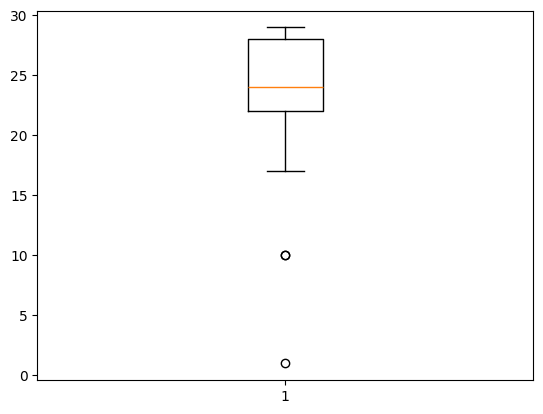

In [12]:
plt.boxplot(newdataset["videoCategoryId"])

In [13]:
def remove_outliers (dataset, attribute) :
    Q1 = dataset[attribute].quantile(0.25)
    Q3 = dataset[attribute].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_removed_dataset = dataset[(dataset[attribute] >= lower_bound) & (dataset[attribute] <= upper_bound)]
    return outliers_removed_dataset

In [14]:
outliers_removed_dataset = remove_outliers (newdataset,"videoCategoryId")

{'whiskers': [<matplotlib.lines.Line2D at 0x209df9bb690>,
 'caps': [<matplotlib.lines.Line2D at 0x209df9b9dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x209df9ec3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x209df9c7610>],
 'fliers': [<matplotlib.lines.Line2D at 0x209df9c6950>],
 'means': []}

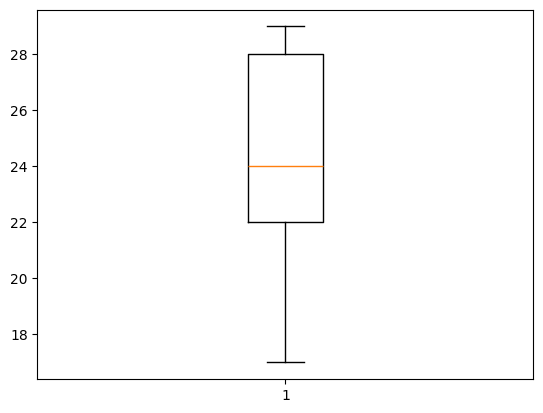

In [15]:
plt.boxplot(outliers_removed_dataset["videoCategoryId"])

In [16]:
outliers_removed_dataset.shape[0]

112

In [17]:
colonne = outliers_removed_dataset["videoCategoryId"]
outliers_removed_dataset

,Watcher,videoCategoryId,videoCategoryLabel,definition
0,Billy,29.0,Nonprofits & Activism,hd
1,Leila,22.0,People & Blogs,sd
2,Billy,22.0,People & Blogs,sd
3,Mark,24.0,Entertainment,hd
4,Billy,24.0,Entertainment,hd
...,...,...,...,...
110,Jeff,24.0,Entertainment,hd
111,Billy,26.0,Howto & Style,sd
112,Clark,28.0,Science & Technology,hd
113,Billy,24.0,Entertainment,sd


In [18]:
items = ["Watcher", "videoCategoryId" , "videoCategoryLabel", "definition"]
uniqueItems = outliers_removed_dataset[items].drop_duplicates()
print(len(uniqueItems))
uniqueItems

98


,Watcher,videoCategoryId,videoCategoryLabel,definition
0,Billy,29.0,Nonprofits & Activism,hd
1,Leila,22.0,People & Blogs,sd
2,Billy,22.0,People & Blogs,sd
3,Mark,24.0,Entertainment,hd
4,Billy,24.0,Entertainment,hd
...,...,...,...,...
109,Loan,22.0,People & Blogs,hd
111,Billy,26.0,Howto & Style,sd
112,Clark,28.0,Science & Technology,hd
113,Billy,24.0,Entertainment,sd


In [19]:
def create_data_table(df):
    transactions = []

    df['videoCategoryLabel'] = df['videoCategoryLabel'].astype(str)
    df['Watcher'] = df['Watcher'].astype(str)
    df['definition'] = df['definition'].astype(str)
    df['videoCategoryId'] = df['videoCategoryId'].astype(str)

    for d in df["videoCategoryLabel"].unique():
        dd = d.replace(" ", "_")
        df["videoCategoryLabel"] = df["videoCategoryLabel"].replace(d, dd)
            
    for _, row in df.iterrows():
        transaction = [
            row["Watcher"],
            row["videoCategoryId"],
            row["videoCategoryLabel"],
            row["definition"]
        ]
        transactions.append(transaction)
    return transactions

transactions = create_data_table(uniqueItems)

df = pd.DataFrame({'transaction': transactions})
data = {index: transaction for index, transaction in enumerate(transactions)}
data
print(sum(data.values(), []))
list(set(sum(data.values(), [])))


['Billy', '29.0', 'Nonprofits_&_Activism', 'hd', 'Leila', '22.0', 'People_&_Blogs', 'sd', 'Billy', '22.0', 'People_&_Blogs', 'sd', 'Mark', '24.0', 'Entertainment', 'hd', 'Billy', '24.0', 'Entertainment', 'hd', 'Jane', '24.0', 'Entertainment', 'hd', 'Babs', '22.0', 'People_&_Blogs', 'hd', 'Jeff', '25.0', 'News_&_Politics', 'hd', 'Leila', '28.0', 'Science_&_Technology', 'hd', 'Jane', '27.0', 'Education', 'hd', 'Naomy', '22.0', 'People_&_Blogs', 'hd', 'Jane', '22.0', 'People_&_Blogs', 'hd', 'Jane', '24.0', 'Entertainment', 'sd', 'Mark', '22.0', 'People_&_Blogs', 'sd', 'Flo', '28.0', 'Science_&_Technology', 'sd', 'Phoebe', '28.0', 'Science_&_Technology', 'sd', 'Jeff', '28.0', 'Science_&_Technology', 'sd', 'Leila', '29.0', 'Nonprofits_&_Activism', 'sd', 'Mark', '29.0', 'Nonprofits_&_Activism', 'hd', 'Rachel', '22.0', 'People_&_Blogs', 'hd', 'Marie', '24.0', 'Entertainment', 'hd', 'Ross', '25.0', 'News_&_Politics', 'hd', 'Adam', '22.0', 'People_&_Blogs', 'hd', 'Ben', '22.0', 'People_&_Blogs'

['27.0',
 'Jess',
 'Jane',
 'Babs',
 'Squeezy',
 'Comedy',
 '25.0',
 'Penny',
 'Amy',
 'Leila',
 'Naomy',
 'Sports',
 'Flo',
 'Cyrus',
 'Ross',
 'Mark',
 'hd',
 'Ibra',
 'Gaming',
 'Kat',
 'Travel_&_Events',
 'Ze',
 'People_&_Blogs',
 'Liza',
 'Chandler',
 'News_&_Politics',
 '29.0',
 'Jack',
 'Seb',
 'Adam',
 '19.0',
 'Leonard',
 '26.0',
 'Sloane',
 'Natoo',
 'Marie',
 'Sheldon',
 '22.0',
 'Science_&_Technology',
 'Nonprofits_&_Activism',
 'Education',
 'Bob',
 'sd',
 '23.0',
 'Rachel',
 'Phoebe',
 '28.0',
 'Alex',
 'Radjesh',
 'Loan',
 'Jeff',
 'Entertainment',
 '17.0',
 'Howard',
 'Clark',
 '24.0',
 'Joey',
 'Ben',
 'Howto_&_Style',
 'Billy',
 'Monica',
 '20.0',
 'Brad']

In [20]:
def item_format(item):
    item_list = list(item.split("'"))
    special_characters = "[', ']"
    item_list_format = [i for i in item_list if  i not in special_characters]
    return item_list_format

def create_ck_table(data, lk, k):
    c = Counter()
    if k == 1:
        item_set = list(set(sum(data.values(), [])))
    else:
        item_set = set()
        temp = list(lk)
        for i in range(0,len(temp)):
            for j in range(i+1,len(temp)):
                t = {z for z in item_format(temp[i])}.union({w for w in item_format(temp[j])})
                if(len(t) == k):
                    t = sorted(t)
                    item_set.add(str(t))
        item_set = list(item_set)
    for i in item_set:
        c[i] = 0
        for d in data.values():
            if all(item in d for item in item_format(i)):
                c[i] += 1
    return c

def display_ck_table(ck, k):
    print("C"+str(k)+":")
    for i in ck:
        i_set = set()
        for it in item_format(i):
            i_set.add(it)
        print(str(i_set)+": "+str(ck[i]))
    print()

def create_lk_table(data, ck, k, s):
    l = Counter()
    for i in ck:
        if(ck[i] >= s):
            l[str(i)] += ck[i]
    return l

def display_lk_table(lk, k):
    final = []
    print("L"+str(k)+":")
    for i in lk:
        i_set = set()
        for it in item_format(i):
            i_set.add(it)
        print(str(i_set)+": "+str(lk[i]))
        final.append(i_set)
    print()
    return final

In [41]:
def apriori(data,s):
    s = len(data) * s
    print(s)
    final = []
    ck = Counter()
    lk = Counter()
    for k in range(1,10000):
        ck = create_ck_table(data,lk,k)
        if len(ck) == 0:
            break
        display_ck_table(ck,k)
        lk = create_lk_table(data,ck,k,s)
        if len(lk) == 0:
            break
        l_items = display_lk_table(lk,k)
        for li in l_items:
            final.append(li)
    return final
final_items = apriori(data,0.2)
print("L :")
print(final_items)

19.6
C1:
{'27.0'}: 8
{'Jess'}: 4
{'Jane'}: 4
{'Babs'}: 1
{'Squeezy'}: 5
{'Comedy'}: 1
{'25.0'}: 5
{'Penny'}: 1
{'Amy'}: 1
{'Leila'}: 4
{'Naomy'}: 3
{'Sports'}: 1
{'Flo'}: 1
{'Cyrus'}: 2
{'Ross'}: 2
{'Mark'}: 6
{'hd'}: 64
{'Ibra'}: 2
{'Gaming'}: 1
{'Kat'}: 3
{'Travel_&_Events'}: 1
{'Ze'}: 2
{'People_&_Blogs'}: 35
{'Liza'}: 2
{'Chandler'}: 1
{'News_&_Politics'}: 5
{'29.0'}: 9
{'Jack'}: 2
{'Seb'}: 1
{'Adam'}: 1
{'19.0'}: 1
{'Leonard'}: 1
{'26.0'}: 1
{'Sloane'}: 3
{'Natoo'}: 6
{'Marie'}: 2
{'Sheldon'}: 2
{'22.0'}: 35
{'Science_&_Technology'}: 27
{'Nonprofits_&_Activism'}: 9
{'Education'}: 8
{'Bob'}: 3
{'sd'}: 34
{'23.0'}: 1
{'Rachel'}: 3
{'Phoebe'}: 2
{'28.0'}: 27
{'Alex'}: 2
{'Radjesh'}: 2
{'Loan'}: 2
{'Jeff'}: 5
{'Entertainment'}: 9
{'17.0'}: 1
{'Howard'}: 1
{'Clark'}: 2
{'24.0'}: 9
{'Joey'}: 3
{'Ben'}: 1
{'Howto_&_Style'}: 1
{'Billy'}: 6
{'Monica'}: 1
{'20.0'}: 1
{'Brad'}: 3

L1:
{'hd'}: 64
{'People_&_Blogs'}: 35
{'22.0'}: 35
{'Science_&_Technology'}: 27
{'sd'}: 34
{'28.0'}: 27

C2:
{'S

In [42]:
def pair_up(items):
    pairs = []
    for i in range(len(items)):
        for j in range(len(items)):
            pairs.append((items[i],items[j]))
    return pairs

def make_rules(items):
    rules = pair_up(items)
    final_rules = list()
    for r in rules :
        X = list(r[0])
        Y = list(r[1])
        for x in X:
            if x in Y:
                Y.remove(x)
        if (X,Y) not in final_rules and len(Y) != 0:
            final_rules.append((X,Y))
    return final_rules

final_rules = make_rules(final_items)

table_rule = []
for fr in final_rules:
    table_rule.append(str(set(fr[0]))+" ---> "+str(set(fr[1])))
pd.DataFrame(table_rule, columns = ["Rule"])

,Rule
0,{'hd'} ---> {'People_&_Blogs'}
1,{'hd'} ---> {'22.0'}
2,{'hd'} ---> {'Science_&_Technology'}
3,{'hd'} ---> {'sd'}
4,{'hd'} ---> {'28.0'}
...,...
71,"{'People_&_Blogs', 'hd'} ---> {'Science_&_Technology', '28.0'}"
72,"{'22.0', 'People_&_Blogs', 'hd'} ---> {'Science_&_Technology'}"
73,"{'22.0', 'People_&_Blogs', 'hd'} ---> {'sd'}"
74,"{'22.0', 'People_&_Blogs', 'hd'} ---> {'28.0'}"


In [45]:
def association_correlation_rules(items, min_conf):
    table = []
    rules = make_rules(items)
    min_c = min_conf * len(data.values())
    for fr in rules:
        x, y = fr
        xy = sum(fr,[])
        count_x, count_y, count_xy = 0, 0, 0
        str_x, str_y = str(set(x)).replace("_", " "), str(set(y)).replace("_", " ")
        rule = str_x +" ---> "+ str_y
        for d in data.values():
            if x[0] in d:
                count_x += 1
            if y[0] in d:
                count_y += 1
            check =  all(item in d for item in xy)
            if check:
                count_xy += 1
        support_x = count_x / len(data.values())
        support_y = count_y / len(data.values())
        support_xy = count_xy / len(data.values())
        conf = support_xy / support_x 
        lift = support_xy / (support_x * support_y)
        if (conf * len(data.values()) >= min_c):
            table.append([rule, str(int(conf*100))+"%", "{:.2f}".format(round(support_xy, 2))])
    return table
table = association_correlation_rules(final_items, 0.15)
pd.DataFrame(table, columns = ["Rule","Confidence" , "Lift"])



,Rule,Confidence,Lift
0,{'hd'} ---> {'People & Blogs'},34%,0.22
1,{'hd'} ---> {'22.0'},34%,0.22
2,{'hd'} ---> {'Science & Technology'},21%,0.14
3,{'hd'} ---> {'28.0'},21%,0.14
4,"{'hd'} ---> {'22.0', 'People & Blogs'}",34%,0.22
5,"{'hd'} ---> {'Science & Technology', '28.0'}",21%,0.14
6,{'People & Blogs'} ---> {'hd'},62%,0.22
7,{'People & Blogs'} ---> {'22.0'},100%,0.36
8,{'People & Blogs'} ---> {'sd'},37%,0.13
9,"{'People & Blogs'} ---> {'22.0', 'hd'}",62%,0.22
